# Declare and read data

In [2]:
import chardet

with open('train_u6lujuX_CVtuZ9i.csv', 'rb') as f:
    train = chardet.detect(f.read(10000))
    print(train)
with open('test_Y3wMUE5_7gLdaTN.csv', 'rb') as f:
    test = chardet.detect(f.read(10000))
    print(test)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
import pandas as pd
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv', encoding='ascii')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv', encoding='ascii')

# EDA

## Basic EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

A Overview about the train dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Describe: 
       ApplicantIncome  CoapplicantIncome  LoanAmou

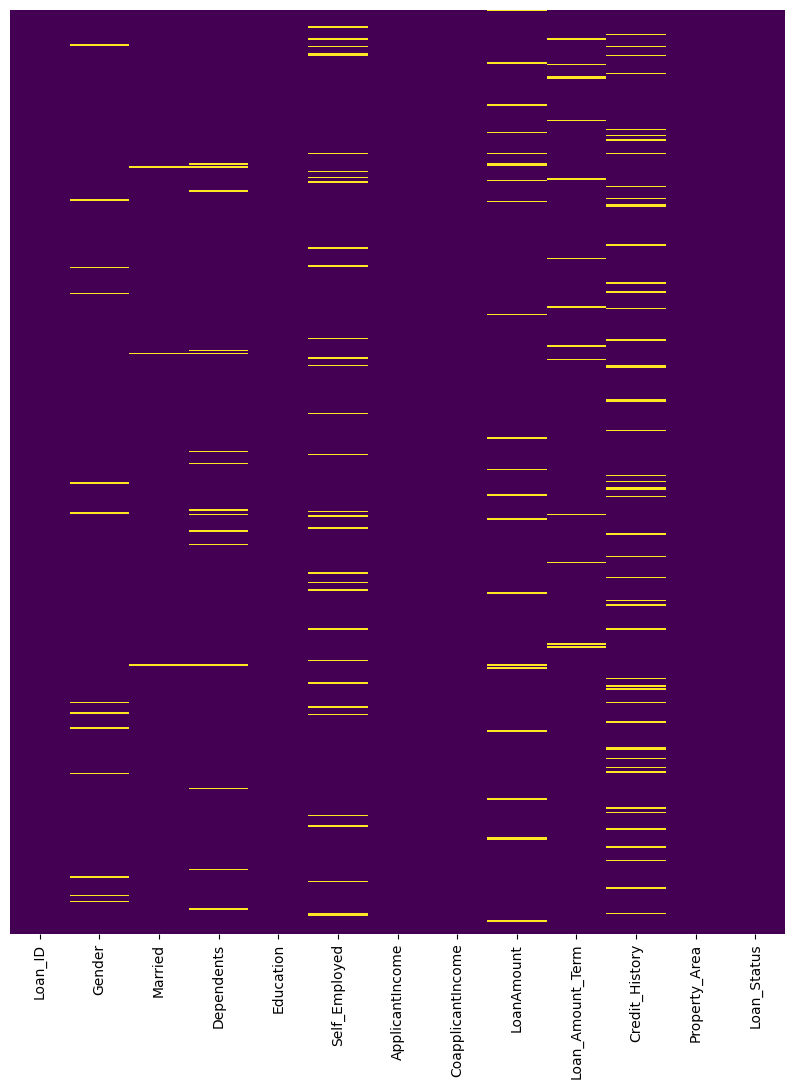

In [7]:
dataoverview(train, 'A Overview about the train dataset')

A Overview about the test dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None

Describe: 
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000   

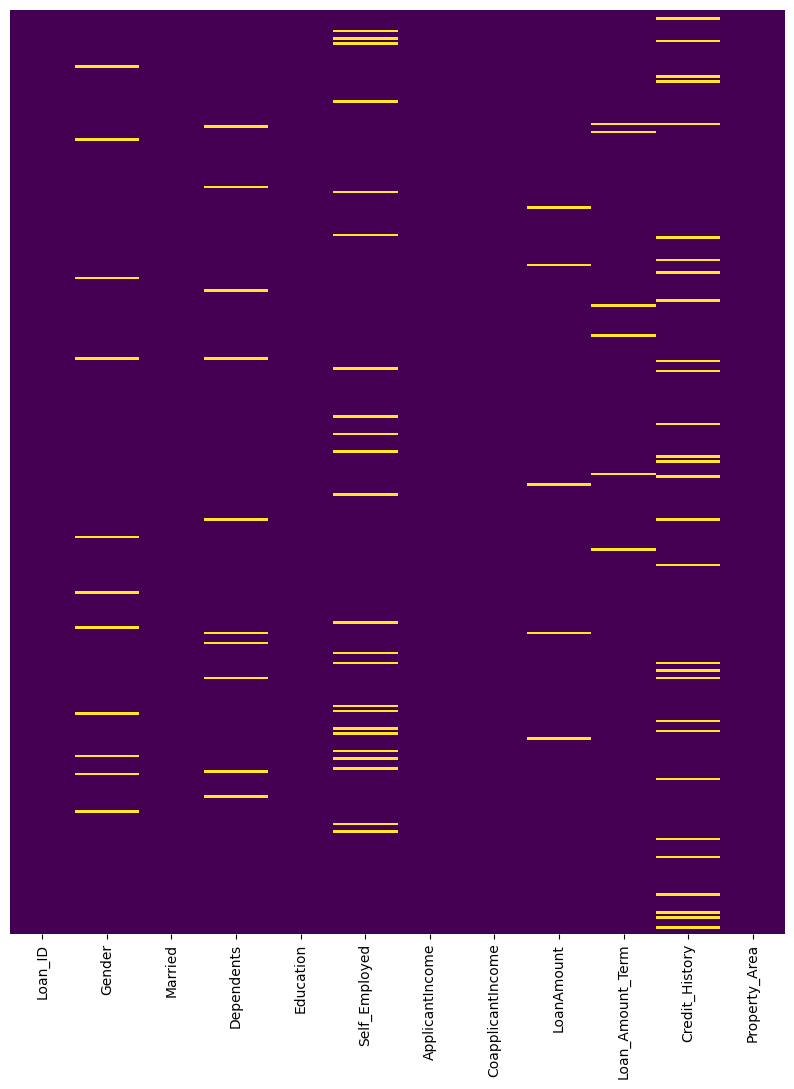

In [8]:
dataoverview(test, 'A Overview about the test dataset')

## Clean data

In [10]:
import warnings
warnings.filterwarnings('ignore')

def handle_missing_data(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    return df

In [11]:
train_cleaned=handle_missing_data(train)
test_cleaned=handle_missing_data(test)

A Overview about the train_cleaned dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Describe: 
       ApplicantIncome  CoapplicantIncome  

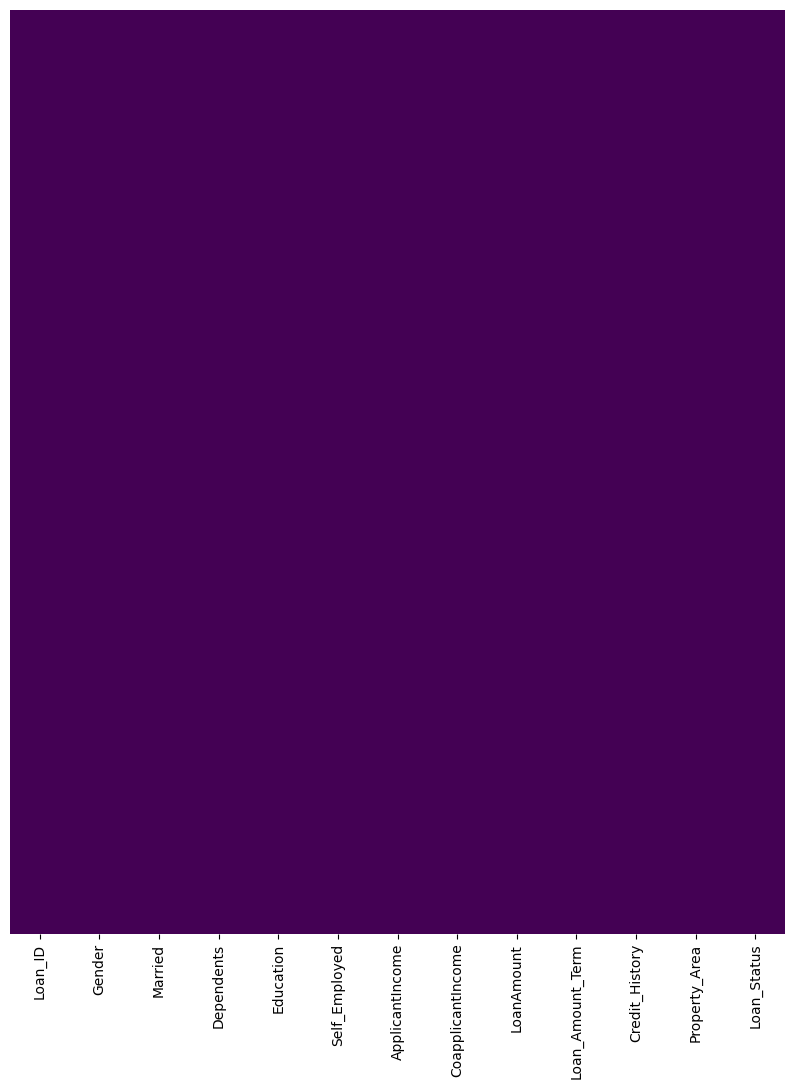

In [12]:
dataoverview(train_cleaned, 'A Overview about the train_cleaned dataset')

A Overview about the test_cleaned dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None

Describe: 
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.0

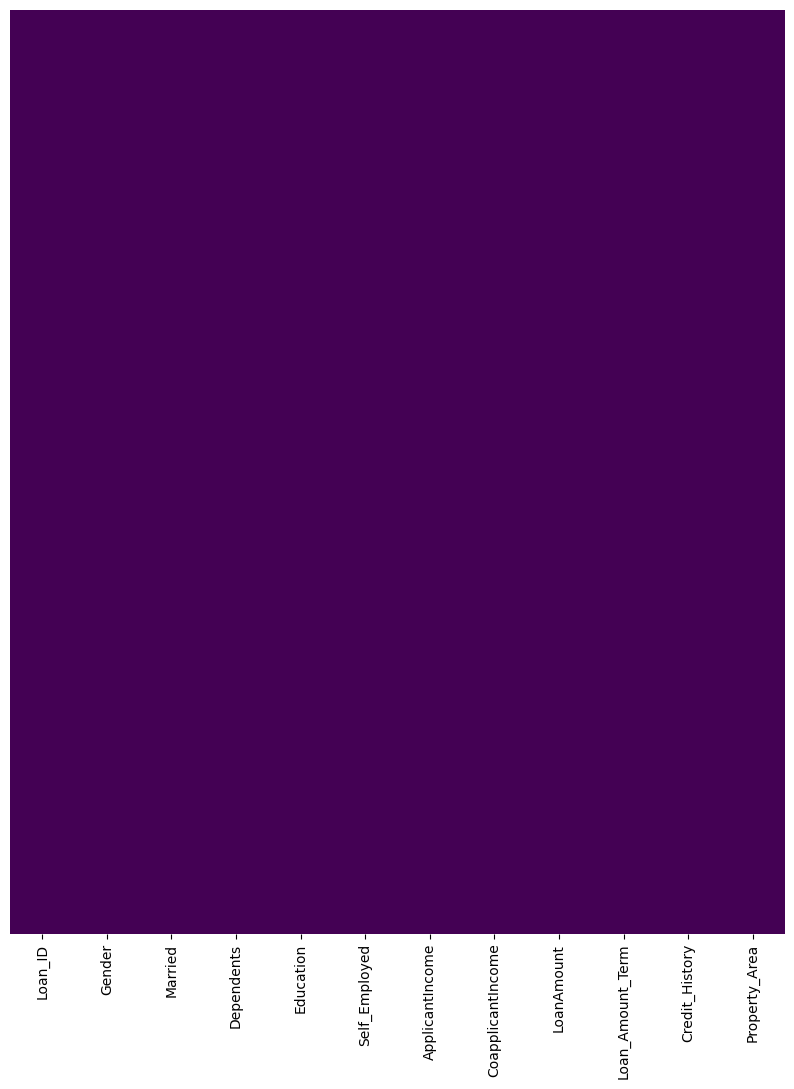

In [13]:
dataoverview(test_cleaned, 'A Overview about the test_cleaned dataset')

## Save data

In [15]:
train_cleaned.to_csv('train_cleaned.csv', index=False)
test_cleaned.to_csv('test_cleaned.csv', index=False)

## Plot charts to understand the data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
def eda_dataset(df):
    #Separating columns to be visualized
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      + df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

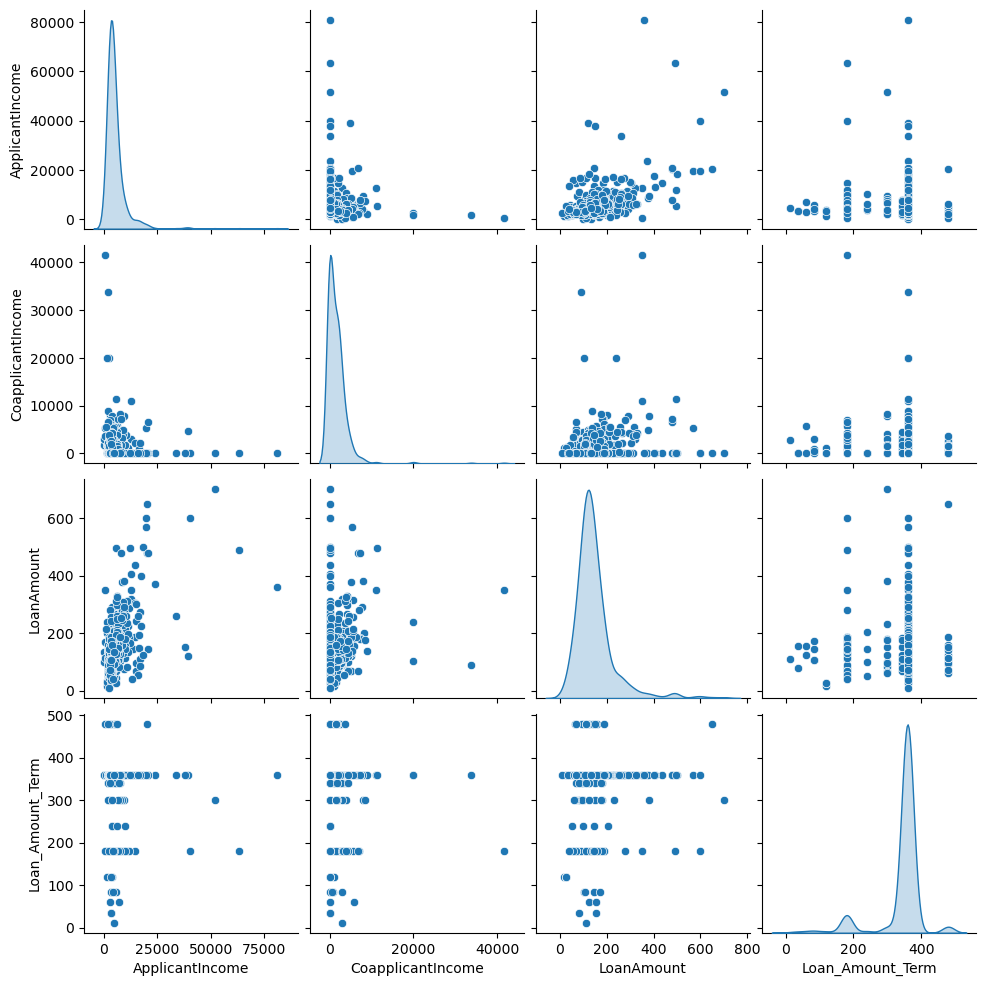

In [18]:
eda_dataset(train_cleaned)

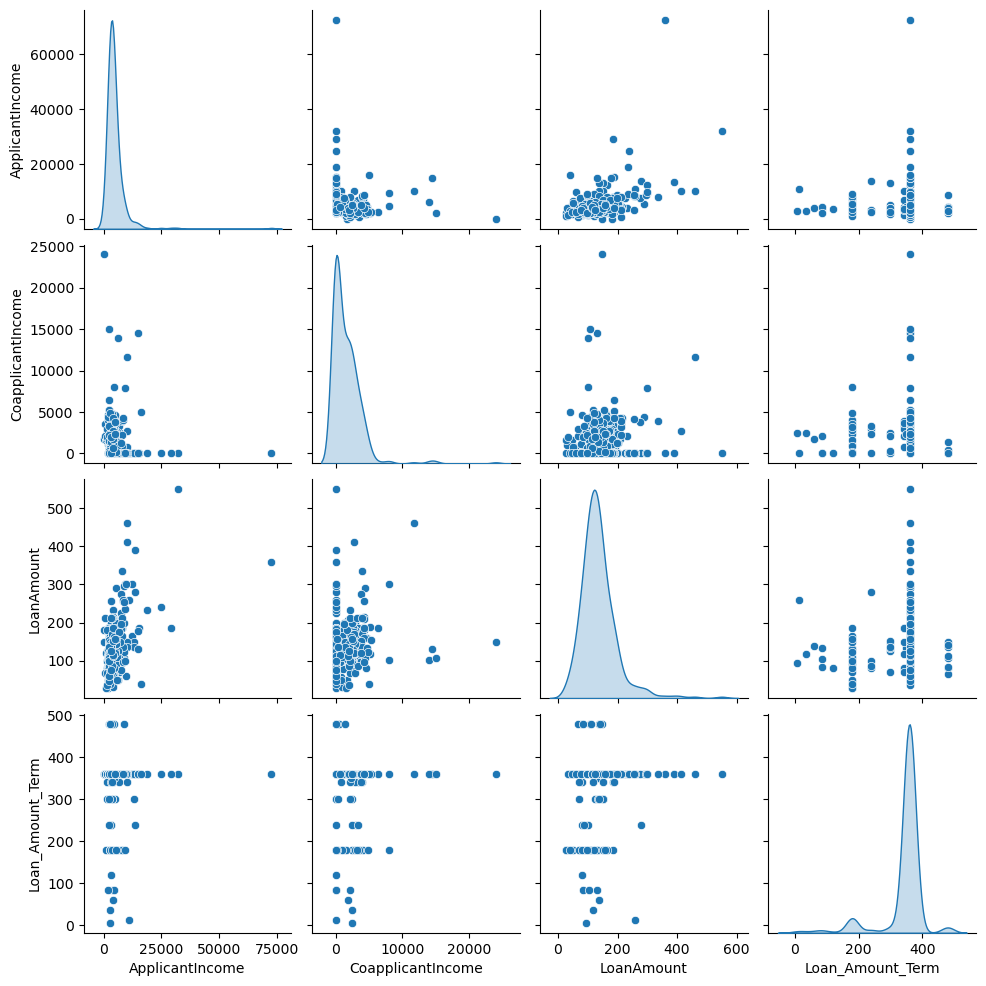

In [19]:
eda_dataset(test_cleaned)

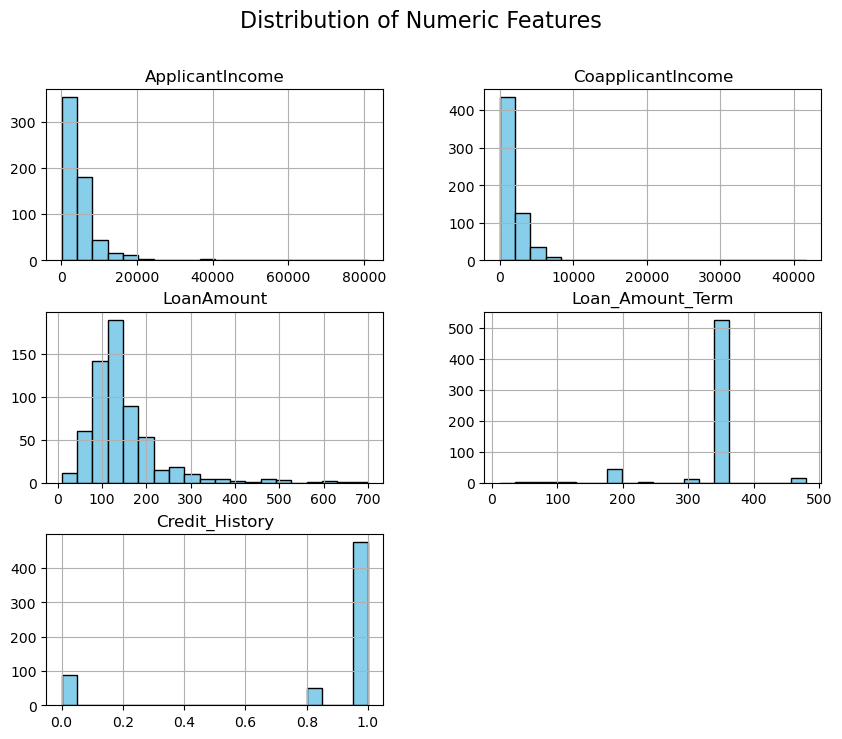

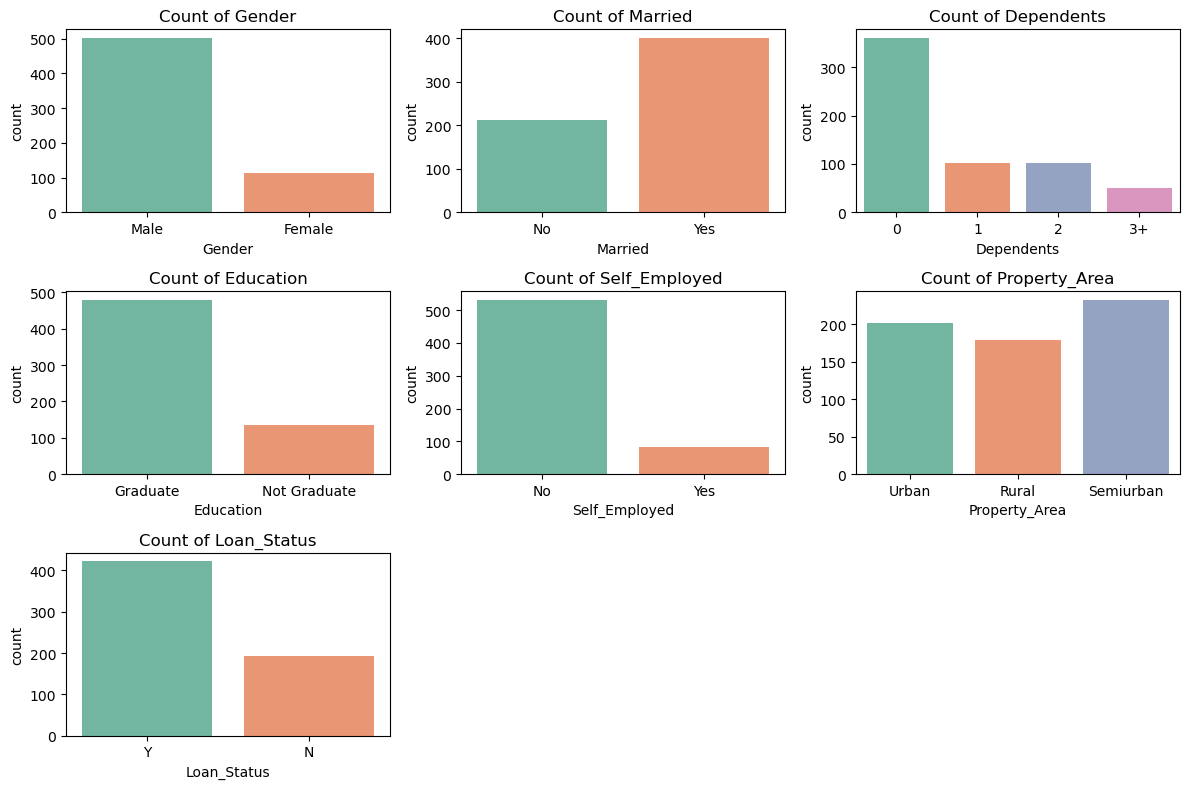

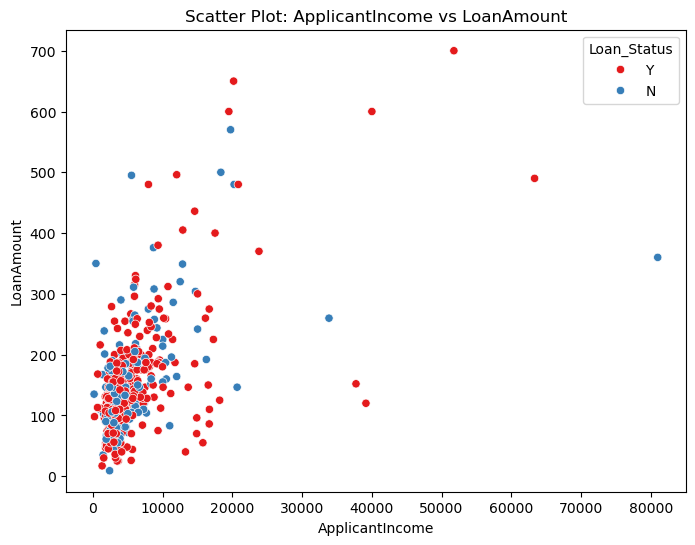

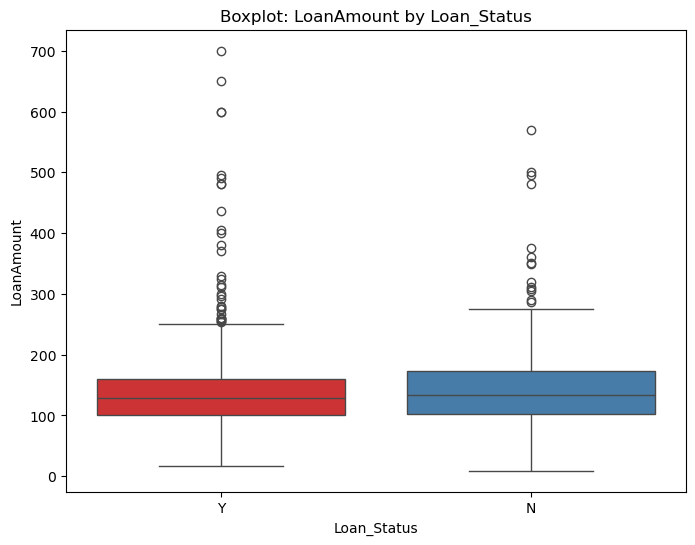

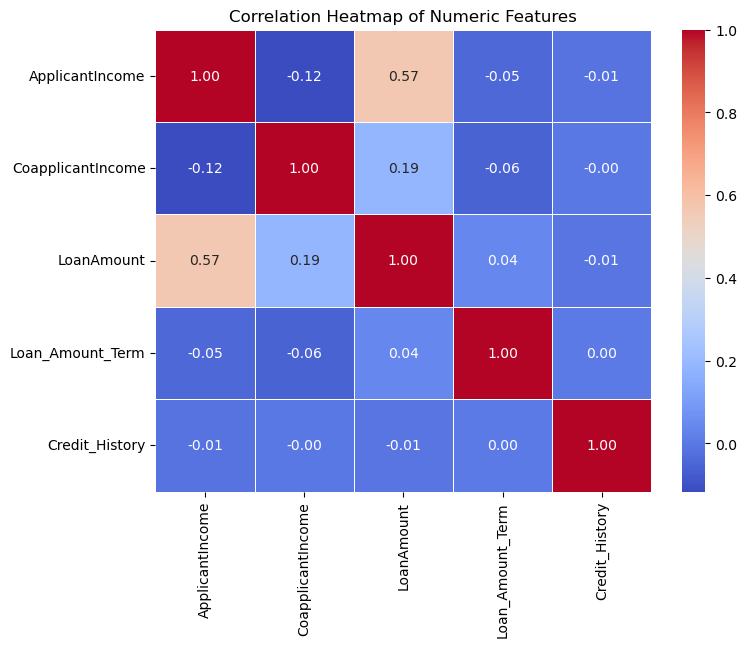

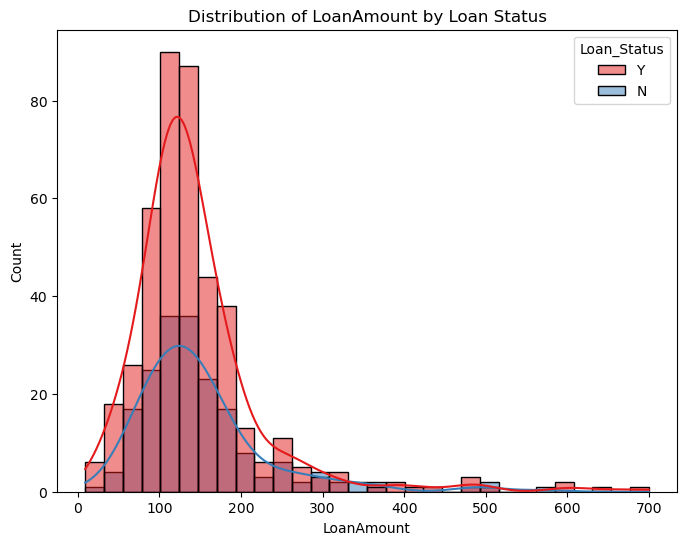

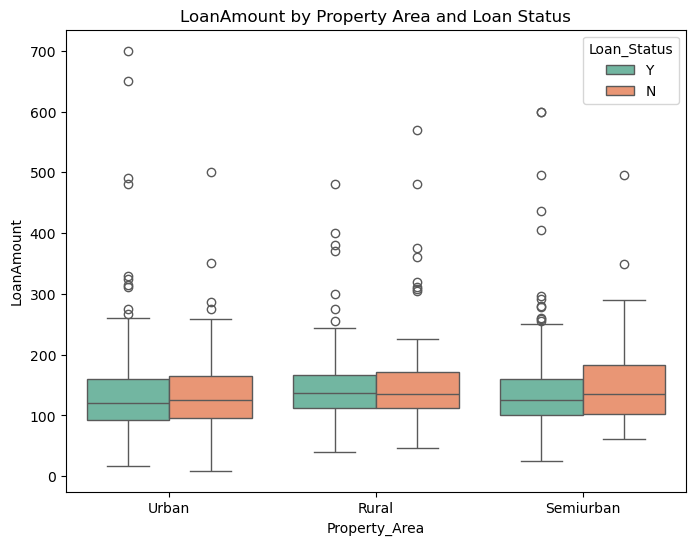

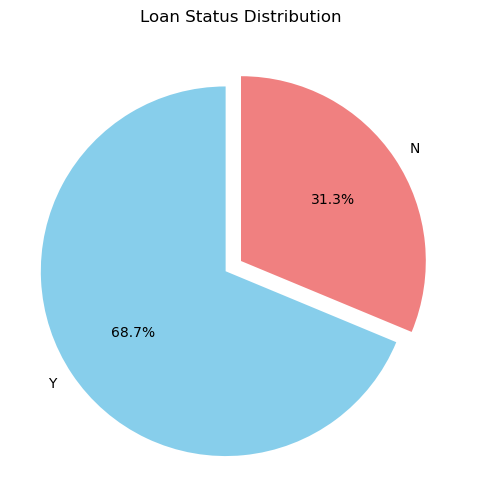

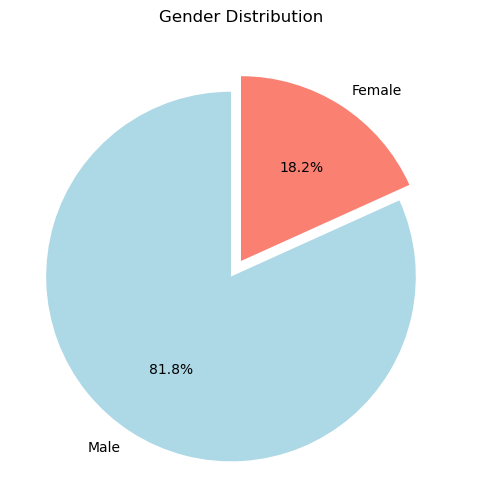

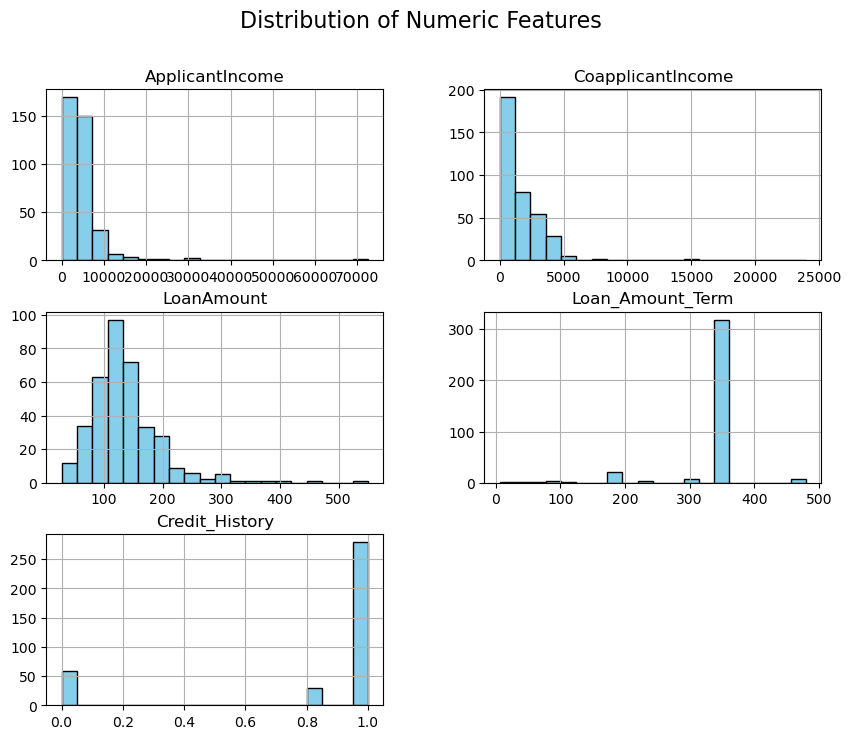

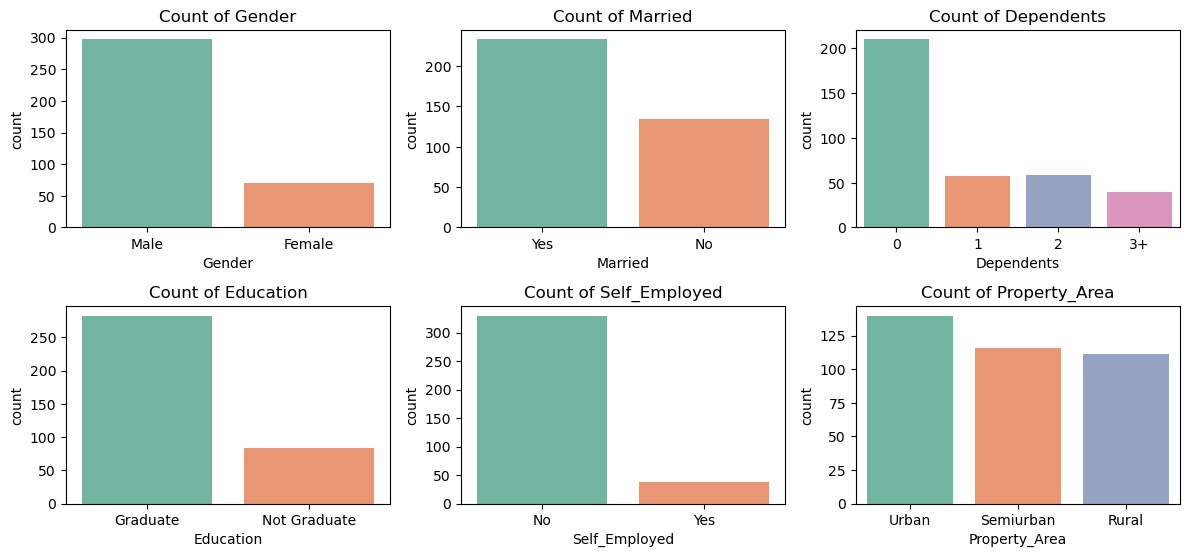

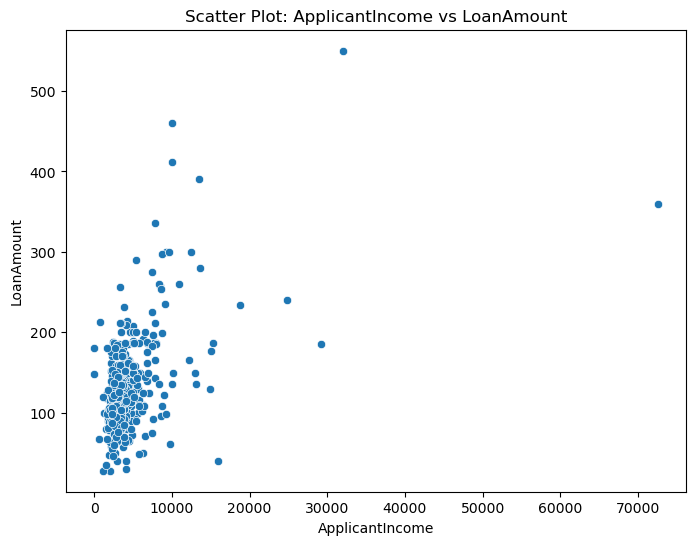

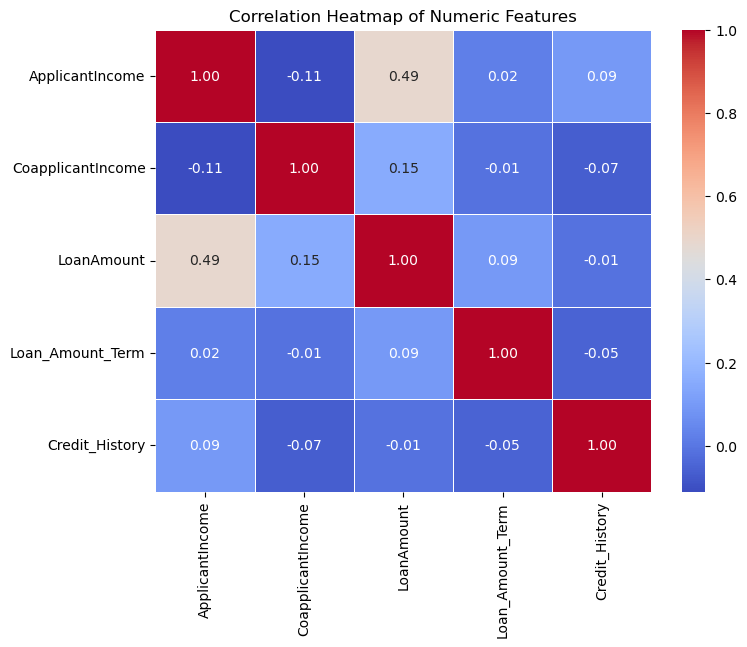

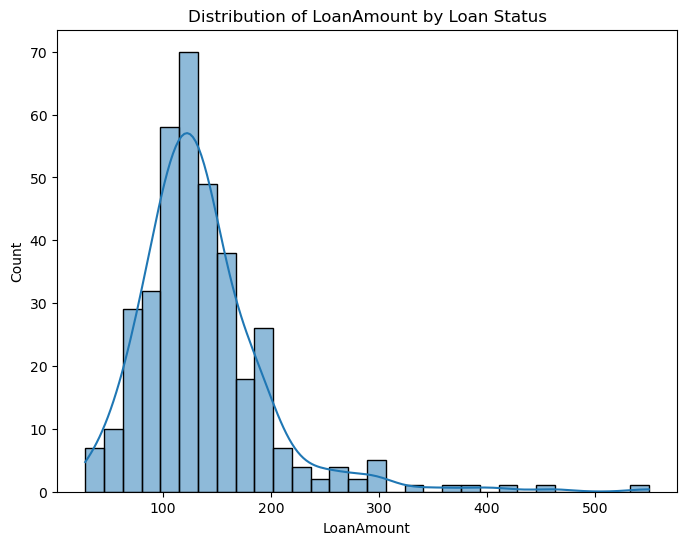

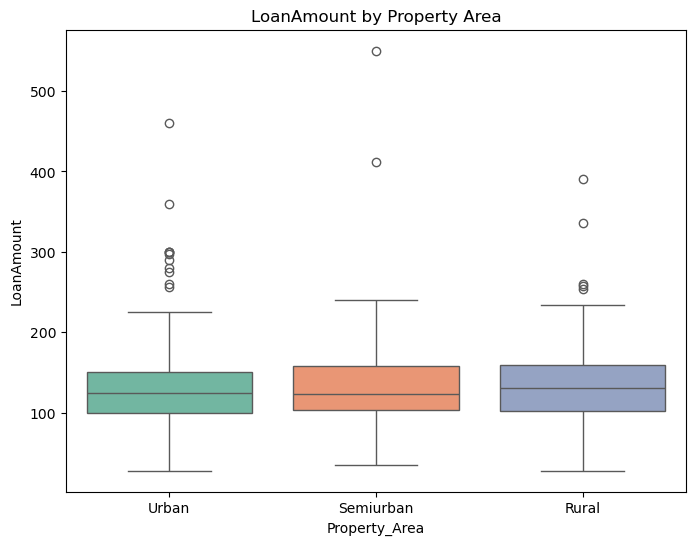

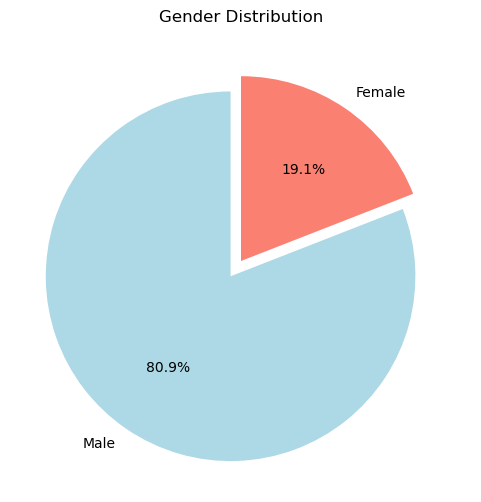

In [20]:
# 1. Distribution Charts for Numeric Features
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
train_cleaned[numeric_features].hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

# 2. Bar Charts for Categorical Features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=train_cleaned, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()

# 3. Scatter Plot of ApplicantIncome vs. LoanAmount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_cleaned, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', palette='Set1')
plt.title('Scatter Plot: ApplicantIncome vs LoanAmount')
plt.show()

# 4. Boxplot of LoanAmount by Loan_Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_cleaned, x='Loan_Status', y='LoanAmount', palette='Set1')
plt.title('Boxplot: LoanAmount by Loan_Status')
plt.show()

# 5. Heatmap: Correlation Matrix
# Calculate the correlation matrix for numeric columns
correlation_matrix = train_cleaned[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 6. Distribution of LoanAmount by Loan_Status (Grouped by Loan_Status)
plt.figure(figsize=(8, 6))
sns.histplot(data=train_cleaned, x='LoanAmount', hue='Loan_Status', kde=True, palette='Set1', bins=30)
plt.title('Distribution of LoanAmount by Loan Status')
plt.show()

# 7. Distribution of LoanAmount by Property_Area and Loan_Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_cleaned, x='Property_Area', y='LoanAmount', hue='Loan_Status', palette='Set2')
plt.title('LoanAmount by Property Area and Loan Status')
plt.show()

# 8. Pie Chart: Loan_Status Proportion
loan_status_counts = train_cleaned['Loan_Status'].value_counts()
plt.figure(figsize=(6, 6))
loan_status_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90, explode=(0.1, 0))
plt.title('Loan Status Distribution')
plt.ylabel('')
plt.show()

# 9. Pie Chart: Gender Proportion
gender_counts = train_cleaned['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90, explode=(0.1, 0))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# 10. Distribution Charts for Numeric Features
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
test_cleaned[numeric_features].hist(bins=20, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

# 11. Bar Charts for Categorical Features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=test_cleaned, x=feature, palette='Set2')
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()

# 12. Scatter Plot of ApplicantIncome vs. LoanAmount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_cleaned, x='ApplicantIncome', y='LoanAmount', palette='Set1')
plt.title('Scatter Plot: ApplicantIncome vs LoanAmount')
plt.show()

# 13. Heatmap: Correlation Matrix
# Calculate the correlation matrix for numeric columns
correlation_matrix = test_cleaned[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# 14. Distribution of LoanAmount by Loan_Status (Grouped by Loan_Status)
plt.figure(figsize=(8, 6))
sns.histplot(data=test_cleaned, x='LoanAmount', kde=True, palette='Set1', bins=30)
plt.title('Distribution of LoanAmount by Loan Status')
plt.show()

# 15. Distribution of LoanAmount by Property_Area and Loan_Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=test_cleaned, x='Property_Area', y='LoanAmount', palette='Set2')
plt.title('LoanAmount by Property Area')
plt.show()

# 16. Pie Chart: Gender Proportion
gender_counts = test_cleaned['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90, explode=(0.1, 0))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()